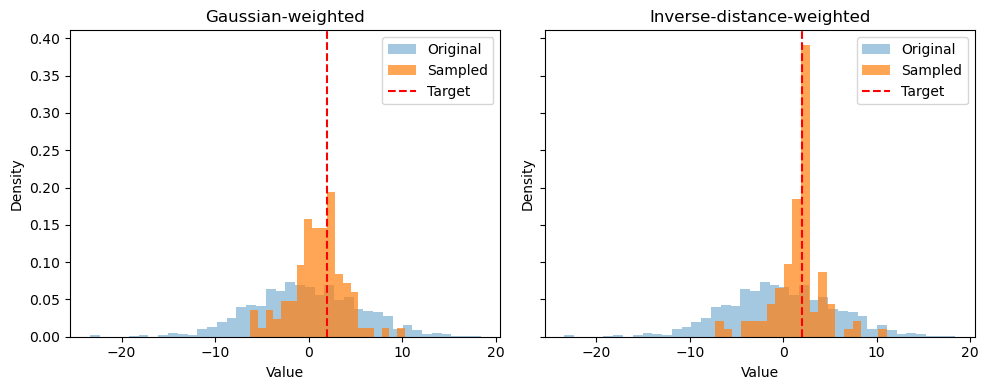

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def weighted_sample(values, target, k=100, method="gaussian", sigma=None, replace=False, rng=None):
    x = np.asarray(values, dtype=float)
    n = x.size
    m = min(k, n)
    d = np.abs(x - float(target))

    if method == "gaussian":
        if sigma is None:
            mad = np.median(np.abs(x - np.median(x)))
            sigma = 1.4826 * mad if mad > 0 else (np.std(x) or 1.0)
            sigma *= 0.5
        w = np.exp(-(d ** 2) / (2.0 * sigma ** 2))
    elif method == "inverse":
        eps = 1e-9
        w = 1.0 / (d + eps)
    else:
        raise ValueError("method must be 'gaussian' or 'inverse'")

    s = w.sum()
    if not np.isfinite(s) or s <= 0:
        w = np.ones_like(w)
        s = w.sum()
    p = w / s

    rng = np.random.default_rng(rng)
    idx = rng.choice(n, size=m, replace=replace, p=p)
    return x[idx], idx, p


# ------------------ Example Usage ------------------

# Original dataset
rng = np.random.default_rng(0)
values = rng.normal(loc=0.0, scale=6.0, size=1000)
target = 2.0

# Sample using both methods
k= 100
samples_gauss, _, _ = weighted_sample(values, target, k=k, method="gaussian", rng=rng)
samples_inv, _, _ = weighted_sample(values, target, k=k, method="inverse", rng=rng)

# ------------------ Plot ------------------

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for ax, samples, title in zip(
        axes,
        [samples_gauss, samples_inv],
        ["Gaussian-weighted", "Inverse-distance-weighted"],
):
    ax.hist(values, bins=40, alpha=0.4, label="Original", density=True)
    ax.hist(samples, bins=20, alpha=0.7, label="Sampled", density=True)
    ax.axvline(target, color="r", linestyle="--", label="Target")
    ax.set_title(title)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()
